# Öznitelik Seçim Algoritmaları Kullanılarak Otizmde Etken Genin Belirlenmesi

NOT: Datasetinin tekrar tekrar çağırılmasındaki sebep datanın kullanıldıkça değişikliğe uğramasıdır.

In [3]:
import pandas as pd
df = pd.read_csv('assignment.txt', sep="\t", header=None)
df.columns=list(df.loc[0,:])
from sklearn.model_selection import train_test_split
cols=list(df.columns)
df=df.drop(0)
df=df.iloc[:,1:].astype(float)
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
X_train, X_test , y_train, y_test= train_test_split(X, y,
                                         test_size=0.5, random_state=1)


C:\Users\90551\AppData\Local\Temp\ipykernel_8692\3604274112.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('assignment.txt', sep="\t", header=None)


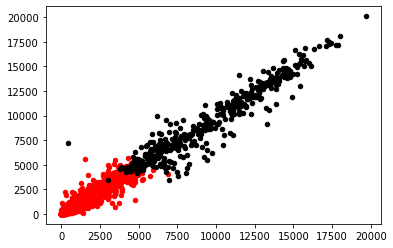

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)
import numpy as np
y_km=kmeans.fit_predict(df)
import matplotlib.pyplot as plt
df=np.array(df)
plt.scatter(df[y_km ==0,0], df[y_km == 0,1], s=20, c='red')
plt.scatter(df[y_km ==1,0], df[y_km == 1,1], s=20, c='black')
plt.show()

In [6]:
indice_0=np.where(df[y_km==0,0])[0]
indice_1=np.where(df[y_km==1,0])[0]

In [7]:
import pandas as pd
df = pd.read_csv('assignment.txt', sep="\t", header=None)
df.columns=list(df.loc[0,:])

cols=list(df.columns)
df=df.drop(0)
df=df.iloc[:,1:].astype(float)

df["autism"]=pd.DataFrame(y_km)


C:\Users\90551\AppData\Local\Temp\ipykernel_8692\3347518579.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('assignment.txt', sep="\t", header=None)


# Öznitelik Seçim Algoritmalarının Uygulanması


## Yüzde seçme algoritması ile etken genimizi bulmaya çalışalım.

In [8]:
numpy_array = df.to_numpy()
np.savetxt(r'C:\Users\90551/autism.txt', numpy_array, fmt = "%f")

In [9]:
df_=df
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df_)




import pandas as pd

X = df_.iloc[:, :-1]
y = df_.iloc[:,-1]

from sklearn.feature_selection import SelectPercentile,chi2
X_new=SelectPercentile(chi2, percentile=0.05).fit_transform(X, y)

In [10]:
X_new

array([[ 173.9045658 ],
       [ 130.9858355 ],
       [1083.302169  ],
       ...,
       [  14.83785868],
       [  39.7973648 ],
       [  91.27292116]])

Eğer datamızdan bakarsak bu eleme yüzdesine giren sütunun "GSM627193" sütunu olduğunu görürüz.

## Chi-square uygulamasını deneyelim

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
chi2_selector = SelectKBest(chi2, k=1)
X_kbest = chi2_selector.fit_transform(X, y)

In [12]:
X_kbest

array([[ 173.9045658 ],
       [ 130.9858355 ],
       [1083.302169  ],
       ...,
       [  14.83785868],
       [  39.7973648 ],
       [  91.27292116]])

Görüldüğü gibi bu algoritma da aynı sonucu verdi. Şu an için denediğimiz iki algoritma da etken genin "GSM627193" olduğunu söylüyor.

## Anova F değeri yardımı ile Öznitelik Seçimi

In [13]:
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=1)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)
X_kbest

array([[ 173.9045658 ],
       [ 130.9858355 ],
       [1083.302169  ],
       ...,
       [  14.83785868],
       [  39.7973648 ],
       [  91.27292116]])

Görüldüğü gibi üçüncü algoritma da aynı geni etken gen olarak belirledi. İşimizi sağlama alma amacıyla bir kaç algoritma üzerinde daha çalışalım.

## Lasso Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


In [15]:
X_train, X_test, y_train , y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((38228, 146), (16384, 146))

In [16]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))
sel_ = SelectFromModel(Lasso(alpha=0.01))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)
selected_feat = X_train.columns[(sel_.get_support())]

print('Toplam Öznitelik: {}'.format((X_train.shape[1])))
print('Seçilen Öznitelik: {}'.format(selected_feat))

Toplam Öznitelik: 146
Seçilen Öznitelik: Index(['GSM627193'], dtype='object')


Görüldüğü gibi Lasso Regression modeli de aynı geni etken gen olarak belirledi.

## Tek Değişkenli Method

In [17]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Specs','Score'] 
print(f_Scores.nlargest(1,'Score')) 

         Specs         Score
122  GSM627193  3.355177e+06


Görüldüğü gibi tekrardan GSM627193 geni etken gen görünüyor.

## Düşük Varyanslı Öznitelikleri Kaldırma Methodu

In [66]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(973500))
sel.fit_transform(X,y)

array([[140.5225645 ],
       [157.8652693 ],
       [639.5981696 ],
       ...,
       [ 31.56369065],
       [ 44.74020619],
       [ 87.99624153]])

Bu algoritma etken genimizi diğer algoritmalardan farklı buldu. Belli ki modelimiz için uygun öznitelik seçim metodu değil.

## Başka Model Yardımıyla Öznitelik Seçimi

In [97]:
import sklearn.feature_selection as fs
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics


gb = GradientBoostingClassifier(n_estimators=1)
gb.fit(X, y)
print("The feature importances of GBDT")
print(gb.feature_importances_)

model = fs.SelectFromModel(gb, prefit=True)
X_trans = model.transform(X)
print("The shape of original data is {}".format(X.shape))
print("The shape of transformed data is {}".format(X_trans.shape))

The feature importances of GBDT
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0718464  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06583253 0.
 0.         0.         0.         0.         0.07184365 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

C:\Users\90551\anaconda3\envs\Pandas\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [98]:
((np.where(gb.feature_importances_.max()==gb.feature_importances_)))

(array([122], dtype=int64),)

In [99]:
df.columns[22]

'GSM627093'

Bu metod da bize beklenenden farklı bir gen verdi. Bunun sebebi algoritmamızın datamıza diğer algoritmalar kadar uymamasıdır.

## Ridge Modeli İle Öznitelik Seçimi

In [111]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.049482457411239134
model score on testing data: -0.004428622776193825


In [112]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=X_train.columns
)


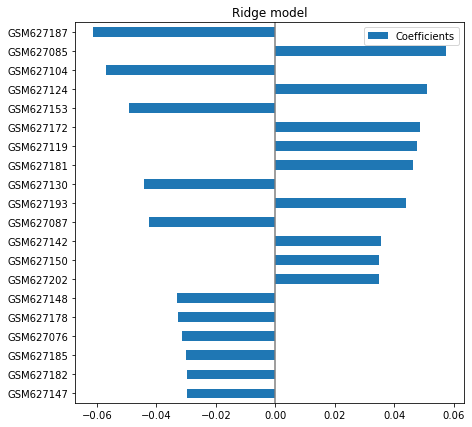

In [113]:
coefs=coefs.reindex(coefs.Coefficients.abs().sort_values().index).tail(20)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Bu metod da datamıza uygun değil görünüyor. İstenen etken geni vermedi.

## Öznitelik Önemi Methodu

In [128]:
 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
 
  
 
# Convert to categorical data by converting data to integers
 
 
 # Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
# Plotting a Bar Graph to compare the models

k=(np.where(feature_importance_normalized==max(feature_importance_normalized)))
print(df.columns[k])

Index(['GSM627121'], dtype='object')


Bu algoritma etken genimizi diğer algoritmalardan farklı buldu. Belli ki bu metod da modelimiz için uygun öznitelik seçim metodu değil.